# Flickbike

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Importing the data
Allereerst wordt de data ingeladen.

In [2]:
df = pd.read_csv('data/bikes.csv', index_col=0, parse_dates=True)
df.head()

,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01


## Analysing the data

In [3]:
df.dtypes

tripid          int64
userid          int64
bikeid          int64
account        object
bikenumber      int64
start_time     object
end_time       object
start_lat     float64
start_lng     float64
end_lat       float64
end_lng       float64
date           object
dtype: object

Omzetten naar correcte datatypes

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['date'] = pd.to_datetime(df['date'])

# extracting extra features
df['weekday'] = df['date'].dt.weekday_name
df['hour'] = df['date'].dt.hour

df.dtypes

tripid                 int64
userid                 int64
bikeid                 int64
account               object
bikenumber             int64
start_time    datetime64[ns]
end_time      datetime64[ns]
start_lat            float64
start_lng            float64
end_lat              float64
end_lng              float64
date          datetime64[ns]
weekday               object
hour                   int64
dtype: object

In [5]:
df.isna().sum()

tripid        0
userid        0
bikeid        0
account       0
bikenumber    0
start_time    0
end_time      0
start_lat     0
start_lng     0
end_lat       0
end_lng       0
date          0
weekday       0
hour          0
dtype: int64

## Vraag 1
**Produceer een plot van verhuur-per-dag voor deze dataset.**  
  
Om dit voor elkaar te krijgen worden eerst alle dagen bij elkaar gegroupeerd zodat de hoeveelheid verhuren per dag opgeteld zullen worden.  
Hierna wordt deze dataset geplot.

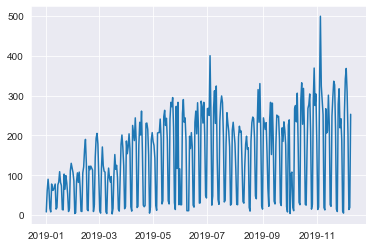

<Figure size 1296x1296 with 0 Axes>

In [6]:
df_dates_count = df.groupby(df['date'].dt.date)['tripid'].count()

x = df_dates_count.index
y = df_dates_count.values

sns.set_style("darkgrid")
plt.plot(x, y)

plt.title("")
plt.xlabel("")
plt.ylabel("")

plt.figure(figsize=(18,18))
plt.show()

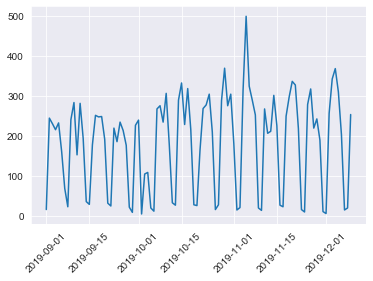

<Figure size 1296x1296 with 0 Axes>

In [7]:
df_dates_count.index = pd.to_datetime(df_dates_count.index)
df_three_months = df_dates_count.loc["2019-09-01":"2019-12-31"]

sns.set_style("darkgrid")
plt.plot(df_three_months.index, df_three_months.values)

plt.title("")
plt.xlabel("")
plt.ylabel("")

plt.xticks(rotation=45)
plt.figure(figsize=(18,18))
plt.show()

## Vraag 2
**Wat is de periodiciteit van deze dataset?**  
  
Om de vraag wat betreft periodiciteit te beantwoorden zal ik gaan kijken of ik bepaalde terugkerende patronen kan vinden in de data. Deze terugkerende patronenen zal ik bij de volgende scopes gaan bekijken:  
- De dag van de week
- Uren van de dag
- Het weer
- Bijzondere dagen, zoals feestdagen, schoolvakanties, etc  
  
### De dag van de week


In [8]:
df_weekday = df_dates_count.copy(deep=True)
df_weekday.index = df_weekday.index.day_name()

df_weekday.groupby(df_weekday.index).mean()

date
Friday       158.265306
Monday       191.959184
Saturday      22.367347
Sunday        20.229167
Thursday     215.448980
Tuesday      220.673469
Wednesday    199.571429
Name: tripid, dtype: float64

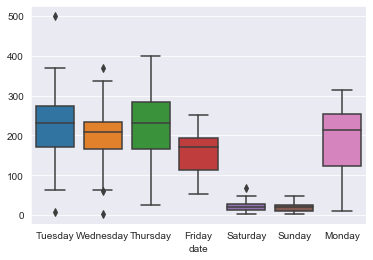

In [9]:
sns.boxplot(x=df_weekday.index, y=df_weekday.values)
plt.show()

### Uren van de dag

In [10]:
df_dates_count.sort_values(ascending=False).head(2)

date
2019-11-05    499
2019-07-04    400
Name: tripid, dtype: int64

Dit geeft aan dat er op de 5e van november in totaal 499 fietsen verhuurt zijn. De volgende stap is om te kijken rond welke uren de vraag het hoogst is.

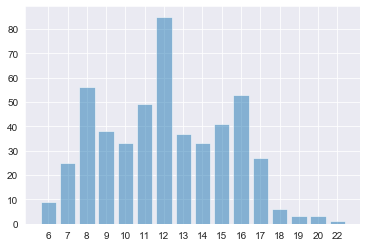

In [23]:
df_1day_hours = df[(df['date'] > '2019-11-05') & (df['date'] < '2019-11-6')]
df_plot = df_1day_hours.groupby(df_1day_hours['hour'])['tripid'].count()

# plotting the bar chart
sns.set_style("darkgrid")

y_pos = np.arange(len(df_plot.index))
plt.bar(y_pos, df_plot.values, align='center', alpha=0.5)

plt.xticks(y_pos, df_plot.index)
plt.ylabel('')
plt.title('')

plt.show()

### Het weer

### Bijzondere dagen